<a href="https://colab.research.google.com/github/olaemy/intro-tf/blob/master/Tf_classification%2C_dropout%2C_early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path ='/content/drive/My Drive/TensorFlow_FILES/DATA/cancer_classification.csv'

df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


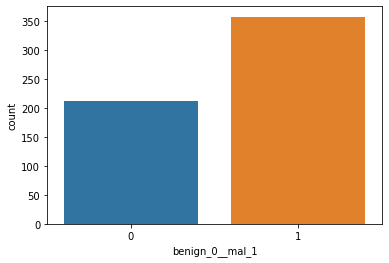

In [ ]:
sns.countplot(df['benign_0__mal_1'])

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

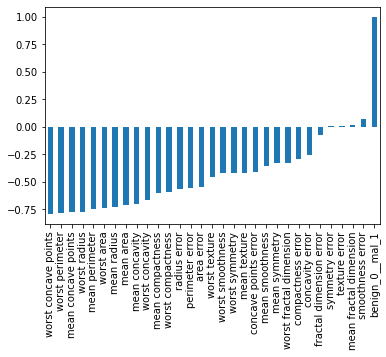

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y =df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train =scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# OUTPUT LAYER
model.add(Dense(1,activation='sigmoid'))


# BINARY CLASSIFICATION uses 'binary'
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6961 - val_loss: 0.6734
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6499 - val_loss: 0.6324
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6128 - val_loss: 0.5957
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5751 - val_loss: 0.5584
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5359 - val_loss: 0.5089
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4898 - val_loss: 0.4610
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4380 - val_loss: 0.4118
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3959 - val_loss: 0.3692
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3546 - val_loss: 0.3297
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3203 - val_loss: 0.2971
Epoch 11

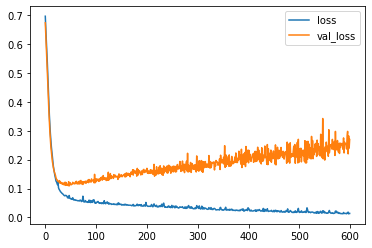

In [ ]:
losses =pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify as an improvement, i.e. an absolute
 |        change of less than min_delta, will count as no
 |        improvem

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# OUTPUT LAYER
model.add(Dense(1,activation='sigmoid'))


# BINARY CLASSIFICATION uses 'binary'
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[earlystopping])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6647 - val_loss: 0.6420
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6199 - val_loss: 0.5923
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5709 - val_loss: 0.5427
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5207 - val_loss: 0.4913
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4704 - val_loss: 0.4383
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4204 - val_loss: 0.3879
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3771 - val_loss: 0.3454
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3409 - val_loss: 0.3095
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3114 - val_loss: 0.2783
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2851 - val_loss: 0.2553
Epoch 11/

In [ ]:
loss_plot= pd.DataFrame(model.history.history)

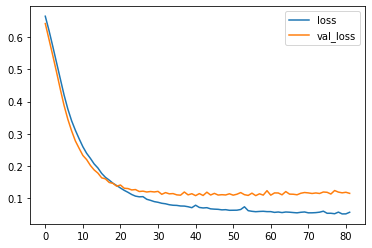

In [ ]:
loss_plot.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# OUTPUT LAYER
model.add(Dense(1,activation='sigmoid'))


# BINARY CLASSIFICATION uses 'binary'
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[earlystopping])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7256 - val_loss: 0.6954
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7035 - val_loss: 0.6825
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6862 - val_loss: 0.6700
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6715 - val_loss: 0.6595
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6570 - val_loss: 0.6490
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6663 - val_loss: 0.6388
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6473 - val_loss: 0.6227
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6376 - val_loss: 0.6099
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6142 - val_loss: 0.5945
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6003 - val_loss: 0.5773
Epoch 11/

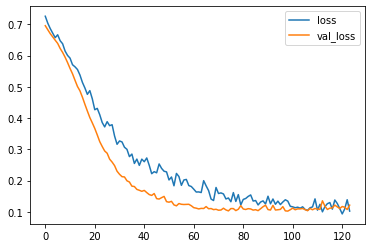

In [ ]:
model_loss =pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
pred = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(pred, y_test))

[[54  4]
 [ 1 84]]


In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.95      0.99      0.97        85

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

